**Importing required libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [4]:
df=pd.read_csv('/content/test_loan.csv')

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

**a. Missing value handling**

Checking null values

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Imputing categorical variables with mode

In [11]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Imputing Numerical features

In [13]:
df['Dependents']= df['Dependents'].str.strip('+')


In [14]:
df['Dependents'].unique()


array(['0', '1', '2', '3', nan], dtype=object)

In [15]:
df['Dependents']=df['Dependents'].astype('float')

(array([200.,  58.,  99.]),
 array([0., 1., 2., 3.]),
 <BarContainer object of 3 artists>)

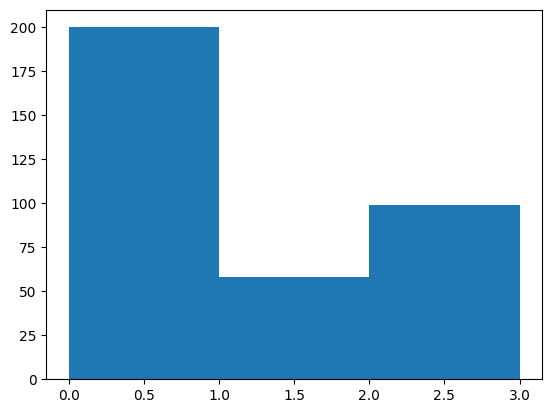

In [16]:
plt.hist(df['Dependents'],bins=3)


In [17]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].median())

(array([ 46., 160., 100.,  37.,   8.,   6.,   2.,   1.,   1.,   1.]),
 array([ 28. ,  80.2, 132.4, 184.6, 236.8, 289. , 341.2, 393.4, 445.6,
        497.8, 550. ]),
 <BarContainer object of 10 artists>)

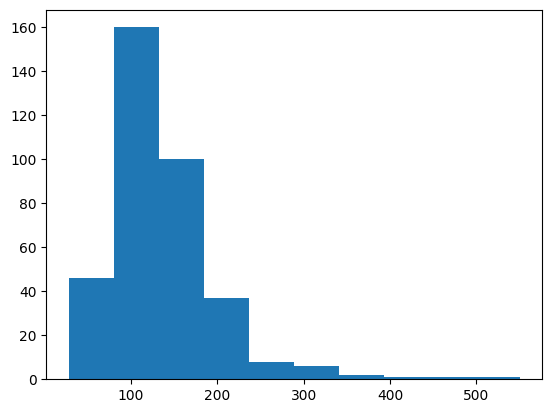

In [18]:
plt.hist(df['LoanAmount'])

In [19]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

(array([  8.,  33., 320.]),
 array([  6., 164., 322., 480.]),
 <BarContainer object of 3 artists>)

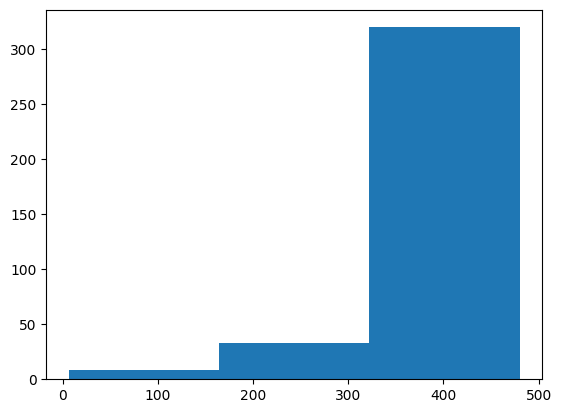

In [20]:
plt.hist(df['Loan_Amount_Term'],bins=3)

In [21]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

(array([ 59., 279.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

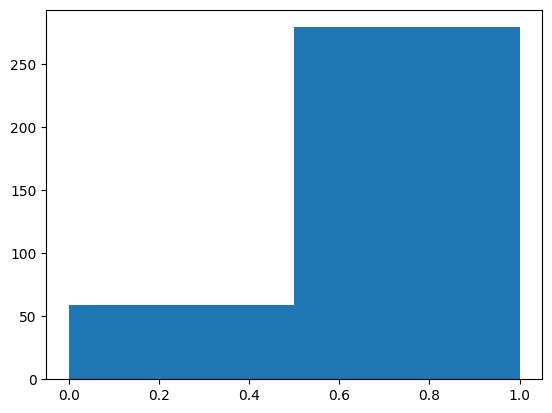

In [22]:
plt.hist(df['Credit_History'],bins=2)

In [23]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [24]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**b. Outlier detection**

Box plot to check if outliers present or not



<Axes: >

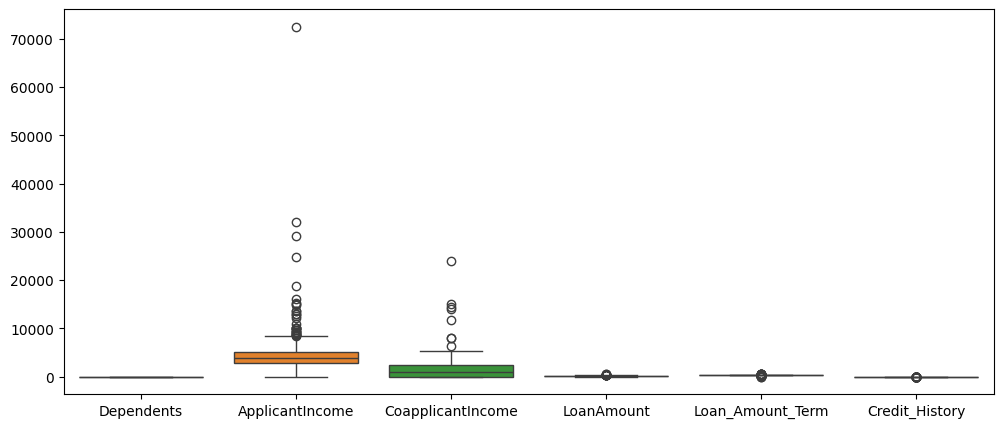

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(df)

Removing outliers in LoanAmount

<Axes: ylabel='LoanAmount'>

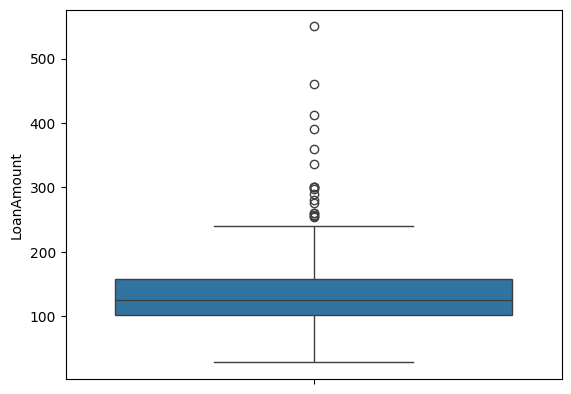

In [26]:
sns.boxplot(df['LoanAmount'])

In [27]:
df['LoanAmount'].unique()

array([110., 126., 208., 100.,  78., 152.,  59., 147., 280., 123.,  90.,
       162.,  40., 166., 124., 131., 200., 300.,  48.,  28., 101., 125.,
       290., 148., 140., 275.,  57.,  75., 192., 158., 176., 185., 116.,
       138.,  84., 108., 187., 120., 160.,  30.,  92., 130., 134., 189.,
       135., 188.,  95.,  65., 139., 232., 144., 155., 186.,  50., 163.,
       360., 149., 257., 102.,  77., 390., 256.,  61., 107., 119., 165.,
        93., 122., 157., 180.,  80., 104., 213., 146.,  71., 225.,  70.,
       132., 105.,  83., 103., 150., 550., 260., 199., 113., 117.,  72.,
       214., 133., 143., 209., 170.,  94.,  79., 159., 173., 235., 336.,
        96., 128., 412., 114., 115.,  88.,  55., 118., 212.,  74.,  66.,
        64., 142., 151.,  81., 171., 234., 184., 112.,  49.,  99., 240.,
       460., 297., 106., 141., 145., 177.,  68., 183., 121., 153.,  67.,
       181.,  35.,  46.,  87., 137., 254., 109., 197.,  85.,  60.,  76.,
        98.])

In [28]:
q1=df['LoanAmount'].quantile(0.25)
q3=df['LoanAmount'].quantile(0.75)
iqr=q3-q1
iqr

56.5

In [29]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll

(242.25, 16.25)

In [30]:
def limit_imputer(value):
  if value>ul:
    return ul
  if value<ll:
    return ll
  else:
    return value

In [31]:
df['LoanAmount']=df['LoanAmount'].apply(limit_imputer)

<Axes: ylabel='LoanAmount'>

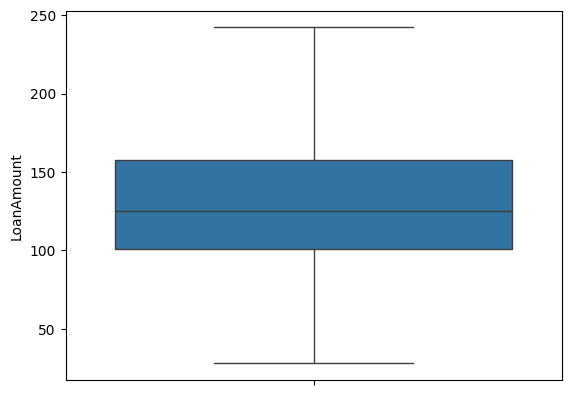

In [32]:
sns.boxplot(df['LoanAmount'])

Removing outliers in Applicant Income

In [33]:
df['ApplicantIncome'].unique()

array([ 5720,  3076,  5000,  2340,  3276,  2165,  2226,  3881, 13633,
        2400,  3091,  2185,  4166, 12173,  4666,  5667,  4583,  3786,
        9226,  1300,  1888,  2083,  3909,  3765,  5400,     0,  4363,
        7500,  3772,  2942,  2478,  6250,  3268,  2783,  2740,  3150,
        7350,  2267,  5833,  3643,  5629,  3644,  1750,  6500,  3666,
        4260,  4163,  2356,  6792,  8000,  2419,  3500,  4116,  5293,
        2750,  4402,  3613,  2779,  4720,  2415,  7016,  4968,  2101,
        4490,  2917,  4700,  3445,  7666,  2458,  3250,  4463,  4083,
        3900,  4750,  3583,  3189,  6356,  3413,  7950,  3829, 72529,
        4136,  8449,  4456,  4635,  3571,  3066,  3235,  5058,  3188,
       13518,  4364,  4766,  4609,  6260,  3333,  9719,  6835,  4452,
        2262,  3901,  2687,  2243,  3417,  1596,  4513,  4500,  4523,
        4742,  4082,  2922,  4167,  4243,  1516,  1762,   724,  3125,
        2333,  3350,  2500, 12500,  4667,  3073,  3321,  3391,  3343,
        3620,  4000,

<Axes: ylabel='ApplicantIncome'>

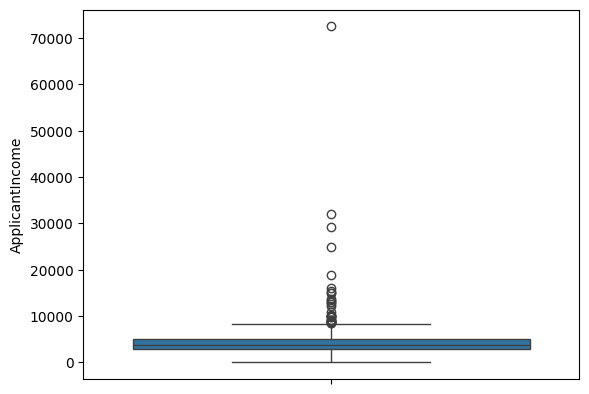

In [34]:
sns.boxplot(df['ApplicantIncome'])

In [35]:
q1=df['ApplicantIncome'].quantile(0.25)
q3=df['ApplicantIncome'].quantile(0.75)
iqr=q3-q1
iqr

2196.0

In [36]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll

(8354.0, -430.0)

In [37]:
def limit_imputer(value):
  if value>ul:
    return ul
  if value<ll:
    return ll
  else:
    return value

In [38]:
df['ApplicantIncome']=df['ApplicantIncome'].apply(limit_imputer)

<Axes: ylabel='ApplicantIncome'>

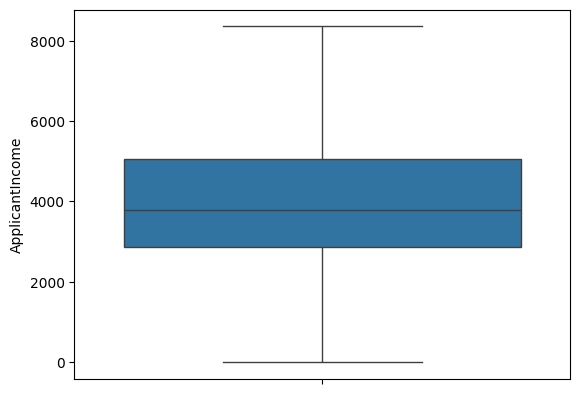

In [39]:
sns.boxplot(df['ApplicantIncome'])

Removing outliers in coapplicant income

<Axes: ylabel='CoapplicantIncome'>

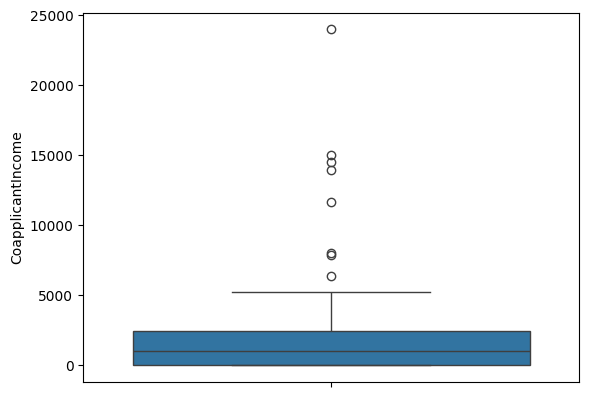

In [40]:
sns.boxplot(df['CoapplicantIncome'])

In [41]:
q1=df['CoapplicantIncome'].quantile(0.25)
q3=df['CoapplicantIncome'].quantile(0.75)
iqr=q3-q1
iqr

2430.5

In [42]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll

(6076.25, -3645.75)

In [43]:
def limit_imputer(value):
  if value>ul:
    return ul
  if value<ll:
    return ll
  else:
    return value

In [44]:
df['CoapplicantIncome']=df['CoapplicantIncome'].apply(limit_imputer)

<Axes: ylabel='ApplicantIncome'>

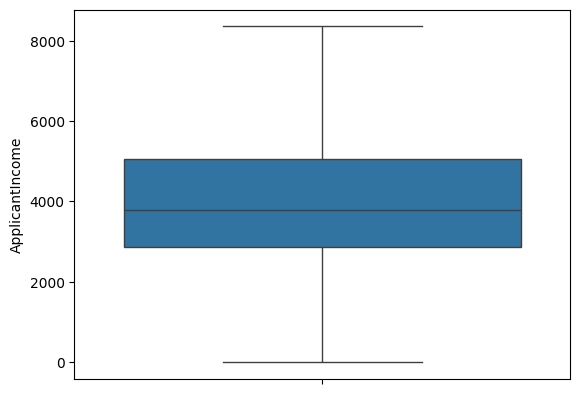

In [45]:
sns.boxplot(df['ApplicantIncome'])

**c. Encoding**

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()

Label Encoding Gender

In [48]:
df['Gender']=le.fit_transform(df['Gender'])

In [49]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0.0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,1,Yes,1.0,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,1,Yes,2.0,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,1,Yes,2.0,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,1,No,0.0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


Label encoding married



In [50]:
df['Married']=le.fit_transform(df['Married'])

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0.0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1.0,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,1,1,2.0,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,1,1,2.0,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,1,0,0.0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


Label Encoding Self employed



In [52]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [53]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0.0,Graduate,0,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1.0,Graduate,0,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,1,1,2.0,Graduate,0,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,1,1,2.0,Graduate,0,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,1,0,0.0,Not Graduate,0,3276.0,0.0,78.0,360.0,1.0,Urban


One hot encoding education

In [54]:
df=pd.get_dummies(df,columns=['Education'])

One hot encoding property area

In [55]:
df=pd.get_dummies(df,columns=['Property_Area'])

In [56]:
df

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,1,1,0.0,0,5720.0,0.0,110.0,360.0,1.0,1,0,0,0,1
1,LP001022,1,1,1.0,0,3076.0,1500.0,126.0,360.0,1.0,1,0,0,0,1
2,LP001031,1,1,2.0,0,5000.0,1800.0,208.0,360.0,1.0,1,0,0,0,1
3,LP001035,1,1,2.0,0,2340.0,2546.0,100.0,360.0,1.0,1,0,0,0,1
4,LP001051,1,0,0.0,0,3276.0,0.0,78.0,360.0,1.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3.0,1,4009.0,1777.0,113.0,360.0,1.0,0,1,0,0,1
363,LP002975,1,1,0.0,0,4158.0,709.0,115.0,360.0,1.0,1,0,0,0,1
364,LP002980,1,0,0.0,0,3250.0,1993.0,126.0,360.0,1.0,1,0,0,1,0
365,LP002986,1,1,0.0,0,5000.0,2393.0,158.0,360.0,1.0,1,0,1,0,0


**d. Scaling**

In [57]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [58]:
df.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=mm.fit_transform(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [59]:
df.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,1,1,0.0,0,0.684702,0.000000,0.382730,0.746835,1.0,1,0,0,0,1
1,LP001022,1,1,1.0,0,0.368207,0.246863,0.457410,0.746835,1.0,1,0,0,0,1
2,LP001031,1,1,2.0,0,0.598516,0.296235,0.840140,0.746835,1.0,1,0,0,0,1
3,LP001035,1,1,2.0,0,0.280105,0.419008,0.336056,0.746835,1.0,1,0,0,0,1
4,LP001051,1,0,0.0,0,0.392147,0.000000,0.233372,0.746835,1.0,0,1,0,0,1
